[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sandhyas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sandhyas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sandhyas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['people', 'remember', 'phone', 'number', 'thirty', 'second'], ['short', 'amount', 'time', 'elapses', 'however', 'number', 'erased', 'memory'], ['information', 'get', 'first', 'place'], ['information', 'make', 'way', 'short', 'term', 'memory', 'stm', 'via', 'sensory', 'storage', 'area'], ['brain', 'filter', 'allows', 'stimulus', 'immediate', 'interest', 'pas', 'stm', 'also', 'known', 'working', 'memory'], ['much', 'debate', 'capacity', 'duration', 'short', 'term', 'memory'], ['accepted', 'theory', 'come', 'george', 'miller', 'cognitive', 'psychologist', 'suggested', 'human', 'remember', 'seven', 'chunk', 'information'], ['chunk', 'defined', 'meaningful', 'unit', 'information', 'word', 'name', 'rather', 'letter', 'number'], ['modern', 'theorist', 'suggest', 'one', 'increase', 'capacity', 'short', 'term', 'memory', 'chunking', 'classifying', 'similar', 'information', 'together'], ['organizing', 'information', 'one', 'optimize', 'stm', 'improve', 'chance', 'memory', 'passed', 'long', 'te

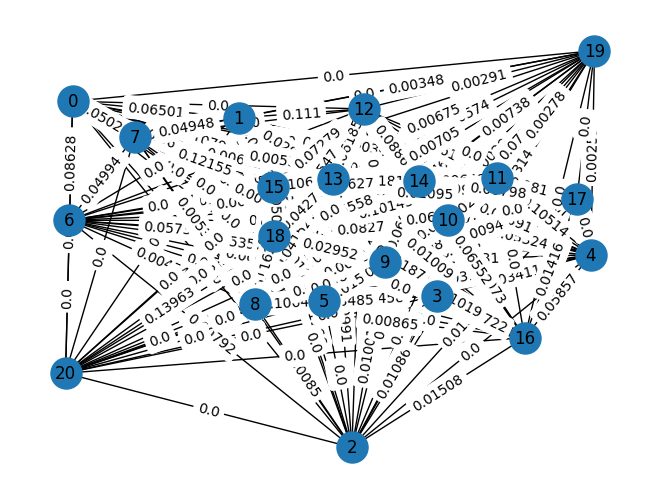

{0: 0.036145873946826924, 1: 0.050663071245039076, 2: 0.01542359491643863, 3: 0.06511752132449528, 4: 0.03903910005922571, 5: 0.0446200115896835, 6: 0.03152607348568468, 7: 0.03291547843286244, 8: 0.04442817468596827, 9: 0.05797239736563032, 10: 0.07319646272720501, 11: 0.05145189070806214, 12: 0.053870026977971455, 13: 0.06999735698520546, 14: 0.059925829881930716, 15: 0.09446360475795017, 16: 0.039241966143692235, 17: 0.026917274830590573, 18: 0.07880108181576109, 19: 0.016466573412126123, 20: 0.017816634707650117}
Enter the required no. of lines for summary:
Enter the required no. of lines for summary:


In [34]:
# %%
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# %%
filename = 'input.txt'
with open(filename, 'r') as file:
    document = file.read()

# %% [markdown]
# Task 1

# %%
lemmatizer=WordNetLemmatizer()

# %%
e_stopwords =set(stopwords.words('english'))
sentences=document.split('\n')

# %%
sentences=[sentence.translate(str.maketrans('','',string.punctuation)) for sentence in sentences]
sentences=[sentence.lower() for sentence in sentences]

# %%
words=[]
for sentence in sentences:
    tokens=[]
    for word in word_tokenize(sentence):
        if word not in e_stopwords:
            tokens.append(lemmatizer.lemmatize(word))
    words.append(tokens)
print(words)

# %% [markdown]
# Task 2

# %%
TF=Counter(x for xs in words for x in set(xs))

# %%
w=len(TF)
n=len(sentences)

# %%
TF_IDF=np.zeros([n,w])

# %%
s_TF=[]
for xs in words:
    s_TF.append(Counter(xs))

# %%
uword=list(TF)
IDF={}

# %%
for word in uword:
    nw=0
    for j in range(n):
        if(s_TF[j][word]>0):
            nw+=1
    IDF[word]=(np.log(n/nw))    
    

# %%
for i in range(n):
    for j in range(w):
        TF_IDF[i][j]=s_TF[i][uword[j]]*IDF[uword[j]]

# %%
print(TF_IDF)

# %% [markdown]
# Task 3

# %%
import networkx as nx
import matplotlib.pyplot as plt
from numpy.linalg import norm

# %%
G=nx.Graph()
G.add_nodes_from([i for i in range(n)])

# %%
cs=np.zeros([n,n])
for i in range(n):
    for j in range(n):
        cs[i][j]=np.dot(TF_IDF[i],TF_IDF[j])/(norm(TF_IDF[i])*norm(TF_IDF[j]))
        cs[i][j]=round(cs[i][j],5)
        if(i!=j):
            G.add_edge(i,j,weight=cs[i][j])

# %%
edge_weights={(u,v):d["weight"] for u,v,d in G.edges(data=True)}
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True, node_size=500)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_weights)
plt.show()

# %%
pr=nx.pagerank(G)

# %%
print(pr)

# %%
pr={k:v for k,v in sorted(pr.items(),key=lambda item:item[1],reverse=True)}

# %%
print("Enter the required no. of lines for summary:")
k = int(input())

# %%
sentenceRank=list(pr)

# %%
summary=[]
f=open("Summary_PR.txt","w")
if(k>n):
    k=n
for i in range(k):
    summary.append(sentenceRank[i])
summary.sort()
for i in summary:
    f.write(sentences[i]+"\n")
f.close()

#%%MMR
R=[i for i in range(n)]
Ssim=[]
rank={}
lam=round(1/n,4)

for i in range(n):
    pRank={}
    for x in R:
        simScore=0
        #print(Ssim, x)
        if(x not in Ssim):
            for z in Ssim:
                if(x!=z):
                    if(x>z):
                        simScore=max(simScore,edge_weights[(z,x)])
                    else:
                        simScore=max(simScore,edge_weights[(x,z)])
            pRank[x]=(lam*pr[x])-(1-lam)*simScore
    if(len(pRank.keys())>0):
        mRank=max(zip(pRank.values(), pRank.keys()))[1]
        rank[mRank]=pRank[mRank]
        #print(mRank)
        Ssim.append(mRank)

rank={k:v for k,v in sorted(rank.items(),key=lambda item:item[1],reverse=True)}

print("Enter the required no. of lines for summary:")
k = int(input())

# %%
sentenceRank=list(rank)

# %%
summary=[]
f=open("Summary_MMR.txt","w")
if(k>n):
    k=n
for i in range(k):
    summary.append(sentenceRank[i])
summary.sort()
for i in summary:
    f.write(sentences[i]+"\n")
f.close()


In [35]:
k=int(input("Enter no. of clusters"))

In [36]:
if(k>n):
    k=n

In [37]:
import random

c_len = len(TF_IDF[0])
unique_elements = list(range(1, c_len + 1))

centroids = []
for _ in range(k):
    sampled_elements = random.sample(unique_elements, c_len)
    centroids.append(sampled_elements)

for i, centroid in enumerate(centroids, 1):
    print(f"Centroid {i}: {centroid}")


Centroid 1: [124, 68, 52, 87, 104, 60, 106, 81, 127, 82, 108, 117, 18, 83, 7, 26, 23, 59, 76, 74, 89, 97, 35, 101, 128, 65, 50, 71, 13, 54, 30, 22, 4, 32, 6, 19, 98, 9, 100, 112, 47, 37, 107, 129, 12, 57, 28, 27, 109, 99, 132, 111, 67, 44, 91, 72, 46, 56, 84, 5, 90, 49, 41, 77, 120, 92, 94, 121, 95, 123, 114, 113, 25, 14, 119, 29, 69, 58, 1, 63, 102, 93, 55, 36, 115, 17, 53, 8, 66, 3, 42, 103, 40, 118, 125, 15, 105, 16, 10, 2, 70, 11, 122, 96, 78, 64, 131, 51, 43, 133, 86, 24, 20, 33, 48, 110, 73, 116, 80, 88, 61, 34, 21, 39, 31, 130, 62, 126, 75, 45, 85, 38, 79]
Centroid 2: [130, 65, 104, 19, 53, 117, 44, 97, 123, 105, 10, 36, 70, 26, 58, 8, 23, 2, 107, 118, 39, 111, 132, 121, 5, 95, 128, 63, 15, 69, 54, 73, 41, 124, 83, 122, 24, 80, 51, 7, 61, 88, 9, 22, 125, 85, 46, 1, 60, 116, 31, 103, 18, 78, 62, 71, 57, 75, 77, 108, 106, 50, 55, 33, 68, 92, 14, 127, 126, 27, 120, 17, 89, 28, 16, 86, 11, 72, 74, 76, 87, 84, 66, 20, 30, 133, 49, 6, 119, 131, 93, 79, 4, 25, 113, 109, 59, 110, 101, 2

In [38]:
def cosineSim(x,y):
    val=np.dot(x,y)/(norm(x)*norm(y))
    return val

In [39]:
currCluster=np.ones(n)
prevCluster=np.zeros(n)

In [40]:
while(True):
    if(currCluster.all() == prevCluster.all()):
        break
    prevCluster=currCluster
    for i in range(n):
        cosSim={}
        for j in range(k):
            cosSim[j+1]=cosineSim(TF_IDF[i],centroids[j])
        currCluster[i]=max(cosSim,key=cosSim.get)
    clusters={}
    for i in range(1,k+1):
        clusters[i]=[]
    for i in range(n):
        clusters[currCluster[i]].append(i)
    for i in range(k):
        centroids[i]=np.zeros(len(TF_IDF[0]))
        for c in clusters[i+1]:
            centroids[i]=np.add(centroids[i],TF_IDF[c])
            centroids[i]=np.divide(centroids[i],len(TF_IDF[c]))
        
        

In [41]:
print(clusters)

{1: [4, 17], 2: [2, 10, 20], 3: [1, 12, 16, 18], 4: [0, 3, 5, 14, 15], 5: [6, 8, 13], 6: [7, 9, 11, 19]}


In [42]:
bigrams = []
for j in sentences:
       temp=[]
       for i in zip(j.split(" ")[:-1], j.split(" ")[1:]):
              temp.append(i[0]+"||"+i[1])
       bigrams.append(temp)
print(bigrams)

[['most||people', 'people||can', 'can||remember', 'remember||a', 'a||phone', 'phone||number', 'number||for', 'for||up', 'up||to', 'to||thirty', 'thirty||seconds'], ['when||this', 'this||short', 'short||amount', 'amount||of', 'of||time', 'time||elapses', 'elapses||however', 'however||the', 'the||numbers', 'numbers||are', 'are||erased', 'erased||from', 'from||the', 'the||memory'], ['how||did', 'did||the', 'the||information', 'information||get', 'get||there', 'there||in', 'in||the', 'the||first', 'first||place'], ['information||that', 'that||makes', 'makes||its', 'its||way', 'way||to', 'to||the', 'the||short', 'short||term', 'term||memory', 'memory||stm', 'stm||does', 'does||so', 'so||via', 'via||the', 'the||sensory', 'sensory||storage', 'storage||area'], ['the||brain', 'brain||has', 'has||a', 'a||filter', 'filter||which', 'which||only', 'only||allows', 'allows||stimuli', 'stimuli||that', 'that||is', 'is||of', 'of||immediate', 'immediate||interest', 'interest||to', 'to||pass', 'pass||on',

In [43]:
def sentenceGraph(s):
    G=nx.DiGraph()
    G.add_node("Start")
    G.add_node("end")
    ls=[]
    for x in s:
        for y in x:
            ls.append(y)
    s_s=list(set(ls))
    for x in s_s:
        G.add_node(x)
    for st in s:
        pNode="Start"
        for x in st:
            G.add_edge(pNode,x)
            pNode=x
        G.add_edge(pNode,"end")
    return G

In [44]:
s={}
for i in range(k):
    s_c={}
    for c in clusters[i+1]:
        s_c[c]=np.sqrt(np.sum(np.square(np.subtract(TF_IDF[c],centroids[i]))))
    s[i+1]=min(s_c,key=s_c.get)
print(s)

{1: 17, 2: 2, 3: 16, 4: 5, 5: 13, 6: 19}


In [52]:
summary={}

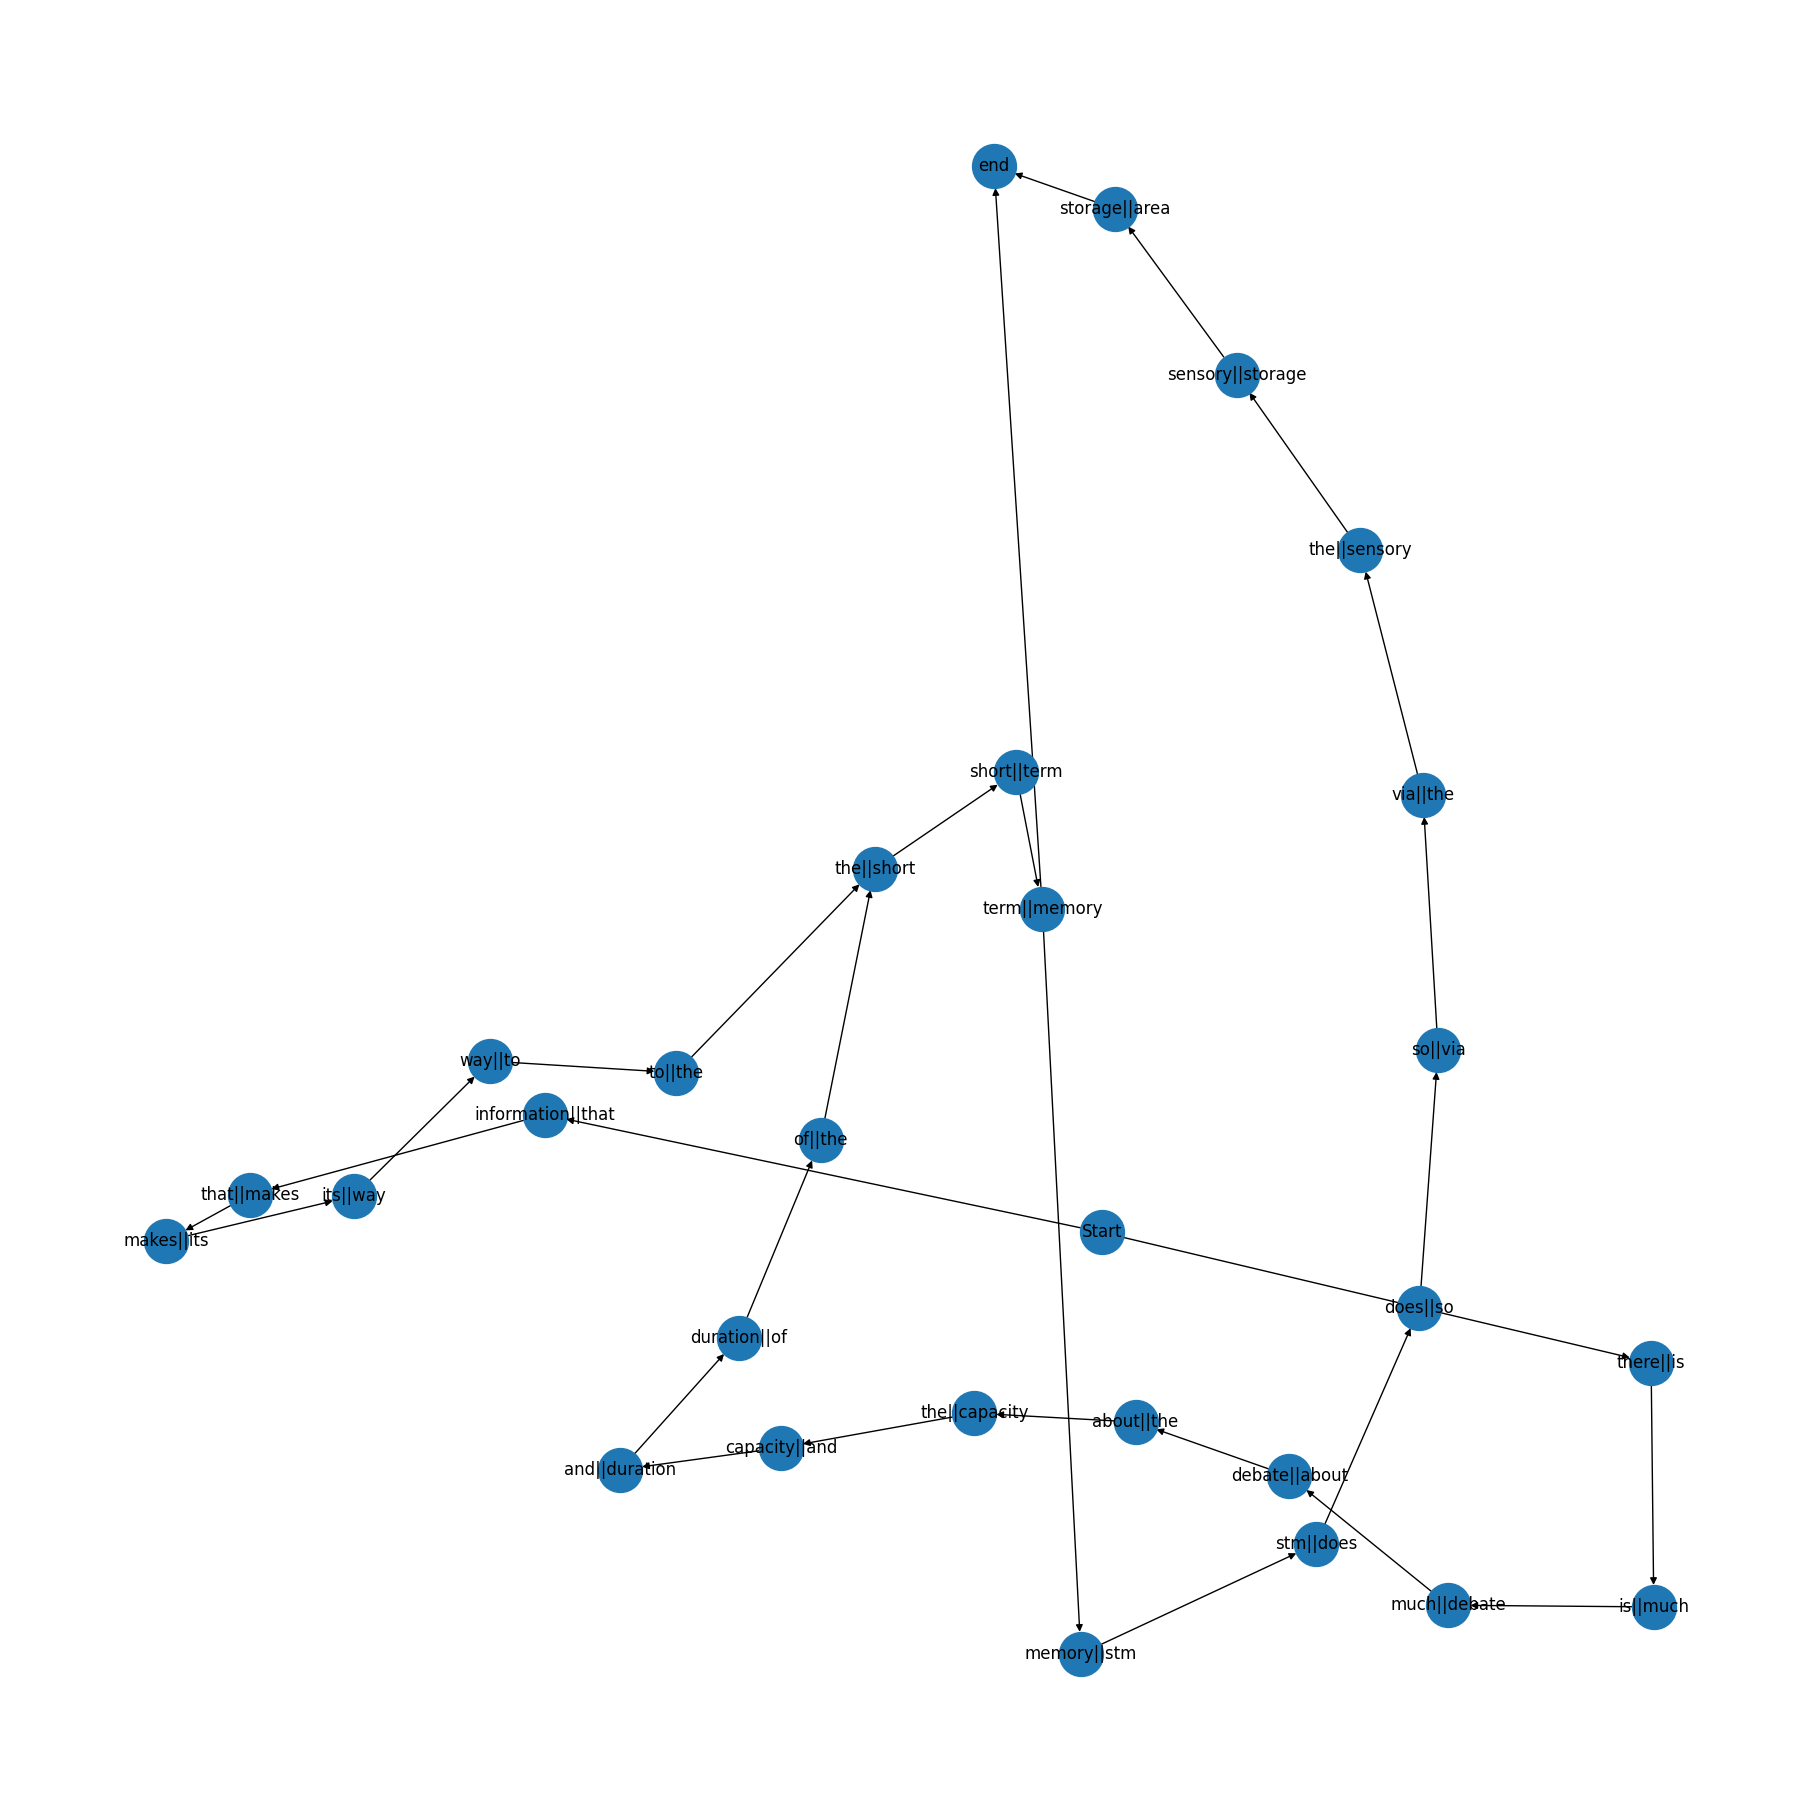

In [58]:
plt.figure(figsize=(18,18))
for i in range(1,k+1):
    closest_sentence=bigrams[s[i]]
    summary[i]=[sentences[s[i]]]
    for j in clusters[i]:
        if j==s[i]:
            continue
        commonBigrams=len(list(np.intersect1d(closest_sentence,bigrams[j])))
        #print(s[i]," ",j," ",commonBigrams)
        if(commonBigrams>=3):
            summary[i]=[]
            G=sentenceGraph([closest_sentence,bigrams[j]])
            pos=nx.spring_layout(G)
            nx.draw(G,pos,with_labels=True,node_size=1000)
            plt.show()
            paths=nx.all_simple_paths(G,source="Start",target="end")
            #print(list(paths))
            for path in list(paths):
                sentence=""
                px=""
                for x in path:
                    if x=="Start" or x=="end":
                        continue
                    term=x.split("||")
                    sentence+=(term[0])
                    sentence+=" "
                    px=term[1]
                sentence+=px
                summary[i].append(sentence)
                
    
        

In [62]:
s = {k: v for k, v in sorted(s.items(), key=lambda item: item[1])}

In [65]:
f=open("Summary_KMeans.txt","w")
for x in s.keys():
    for y in summary[x]:
        f.write(y+"\n")

In [68]:
len(["an apple keeps doctor away"][0])

26